## Comparison between Delta and Alpha function for Excitatory neuron (post-synaptic)

In [7]:
from brian2 import *

# Parameters
R            = 50  *Mohm          # membrane resitance [MOhm]
tau_m        = 20.0 * ms          # excitatory neuron membrane time constant [ms]
c_m          = tau_m/R            # Capacitance excitatory neurons [nF]
tauRef       = 2.0 *ms            # refractory time [ms]
v_rest       = -70.0 *mV          # resting potential [mV]
Vt           = -50.0 *mV          # threshold [mV]
Vr           = -60.0 *mV          # reset [mV]  
tau_syn_e    = 0.1 *ms            # time constant for synapse [ms] 

# Neuron model with alpha function for synpases
eqs_alpha = '''
    dv/dt = (v_rest-v)/tau_m + (ie + i_inj)/c_m  : volt (unless refractory)
    
    die/dt = (2.7182818284590451*ye-ie)/tau_syn_e : ampere
    dye/dt = -ye/tau_syn_e                        : ampere
    i_inj : ampere
    '''
# Neuron model without alpha function for synapses
eqs = '''
    dv/dt = (v_rest-v)/tau_m   + (i_inj/c_m)  : volt (unless refractory)
   i_inj : ampere
    '''
# Coefficient for equivalence
coeff=0.65782288

In [8]:
weV=2


# Create a Spike generator that spikes at 200ms
indices = array([0])
times = array([200])*ms
G = SpikeGeneratorGroup(1, indices, times)    

#=========================== Neuron with alpha synapse ==========================================#

# Create a Neuron Group with only one neuron
N1 = NeuronGroup(1, eqs_alpha, threshold='v>Vt', reset='v = Vr', refractory=2*ms, method='exact')
N1.v = v_rest        # initial condition for membrane potential
N1.ye = 0*mA         # initial condition for ye (auxiliary variable for alpha function)
N1[0].i_inj=0.*nA    # injected or external current

# Synapse between Spike Generator and Neuron
C1 = Synapses(G, N1, on_pre='ye += weI')
C1.connect(j='i')
weI = (weV/coeff) *nA #synaptic current

# Spike Monitor to store 
M1 = StateMonitor(N1, 'v', record=True)

#=========================== Neuron with delta synapse ==========================================#

# Create a Neuron Group with only one neuron
N2 = NeuronGroup(1, eqs, threshold='v>Vt', reset='v = Vr', refractory=2*ms, method='exact')
N2.v = v_rest        # initial condition for membrane potential
N2[0].i_inj=0.*nA    # injected or external current

# Synapse between Spike Generator and Neuron
C2 = Synapses(G, N2, on_pre='v += weV')
C2.connect(j='i')
weV = weV*mV #synaptic current

# Spike Monitor to store 
M2 = StateMonitor(N2, 'v', record=True)


# Run simulation
run( 0.5* second)

Text(0, 0.5, 'Membrane Potential (mV)')

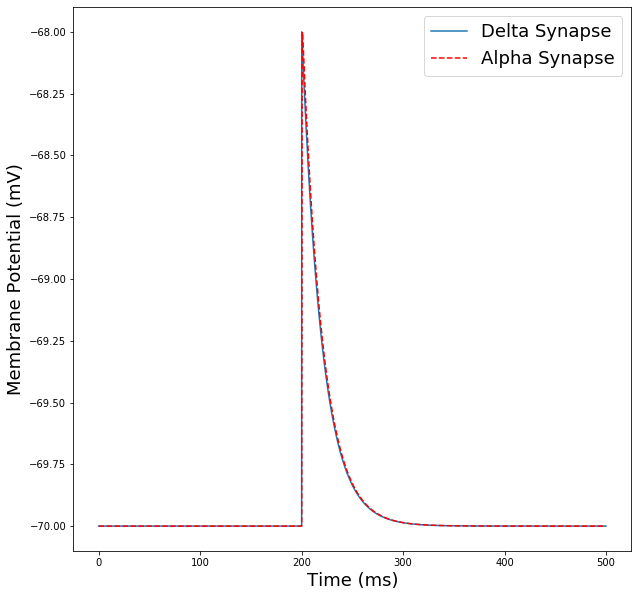

In [11]:
rcParams['figure.figsize'] = 10, 10
plot(M2.t/ms, M2.v[0]/mV)
plot(M1.t/ms, M1.v[0]/mV,'r--')
legend(('Delta Synapse','Alpha Synapse'),fontsize=18)
xlabel('Time (ms)',fontsize=18)
ylabel('Membrane Potential (mV)',fontsize=18)

## Comparison between Delta and Alpha function for Inhibitory neuron (post-synaptic)


In [12]:
from brian2 import *

# Parameters
R            = 50  *Mohm          # membrane resitance [MOhm]
tau_m        = 10.0 * ms          # inhibitory neuron membrane time constant [ms]
c_m          = tau_m/R            # Capacitance inhibitory neurons [nF]
tauRef       = 2.0 *ms            # refractory time [ms]
v_rest       = -70.0 *mV          # resting potential [mV]
Vt           = -50.0 *mV          # threshold [mV]
Vr           = -60.0 *mV          # reset [mV]  
tau_syn_e    = 0.1 *ms            # time constant for synapse [ms] 

# Neuron model with alpha function for synpases
eqs_alpha = '''
    dv/dt = (v_rest-v)/tau_m + (ie + i_inj)/c_m  : volt (unless refractory)
    
    die/dt = (2.7182818284590451*ye-ie)/tau_syn_e : ampere
    dye/dt = -ye/tau_syn_e                        : ampere
    i_inj : ampere
    '''
# Neuron model without alpha function for synapses
eqs = '''
    dv/dt = (v_rest-v)/tau_m   + (i_inj/c_m)  : volt (unless refractory)
   i_inj : ampere
    '''
# Coefficient for equivalence
coeff=1.28295718

In [13]:
weV=2


# Create a Spike generator that spikes at 200ms
indices = array([0])
times = array([200])*ms
G = SpikeGeneratorGroup(1, indices, times)    

#=========================== Neuron with alpha synapse ==========================================#

# Create a Neuron Group with only one neuron
N1 = NeuronGroup(1, eqs_alpha, threshold='v>Vt', reset='v = Vr', refractory=2*ms, method='exact')
N1.v = v_rest        # initial condition for membrane potential
N1.ye = 0*mA         # initial condition for ye (auxiliary variable for alpha function)
N1[0].i_inj=0.*nA    # injected or external current

# Synapse between Spike Generator and Neuron
C1 = Synapses(G, N1, on_pre='ye += weI')
C1.connect(j='i')
weI = (weV/coeff) *nA #synaptic current

# Spike Monitor to store 
M1 = StateMonitor(N1, 'v', record=True)

#=========================== Neuron with delta synapse ==========================================#

# Create a Neuron Group with only one neuron
N2 = NeuronGroup(1, eqs, threshold='v>Vt', reset='v = Vr', refractory=2*ms, method='exact')
N2.v = v_rest        # initial condition for membrane potential
N2[0].i_inj=0.*nA    # injected or external current

# Synapse between Spike Generator and Neuron
C2 = Synapses(G, N2, on_pre='v += weV')
C2.connect(j='i')
weV = weV*mV #synaptic current

# Spike Monitor to store 
M2 = StateMonitor(N2, 'v', record=True)


# Run simulation
run( 0.5* second)

Text(0, 0.5, 'Membrane Potential (mV)')

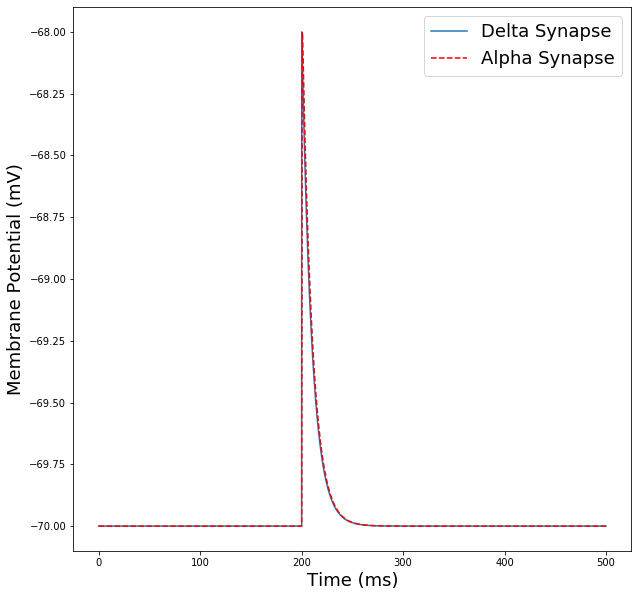

In [14]:
rcParams['figure.figsize'] = 10, 10
plot(M2.t/ms, M2.v[0]/mV)
plot(M1.t/ms, M1.v[0]/mV,'r--')
legend(('Delta Synapse','Alpha Synapse'),fontsize=18)
xlabel('Time (ms)',fontsize=18)
ylabel('Membrane Potential (mV)',fontsize=18)